In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse  # 추정의 표준오차
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [2]:
df_raw = pd.read_csv("/home/pirl/Downloads/BigDataAnalysis/DIABETES.csv", engine="python")
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


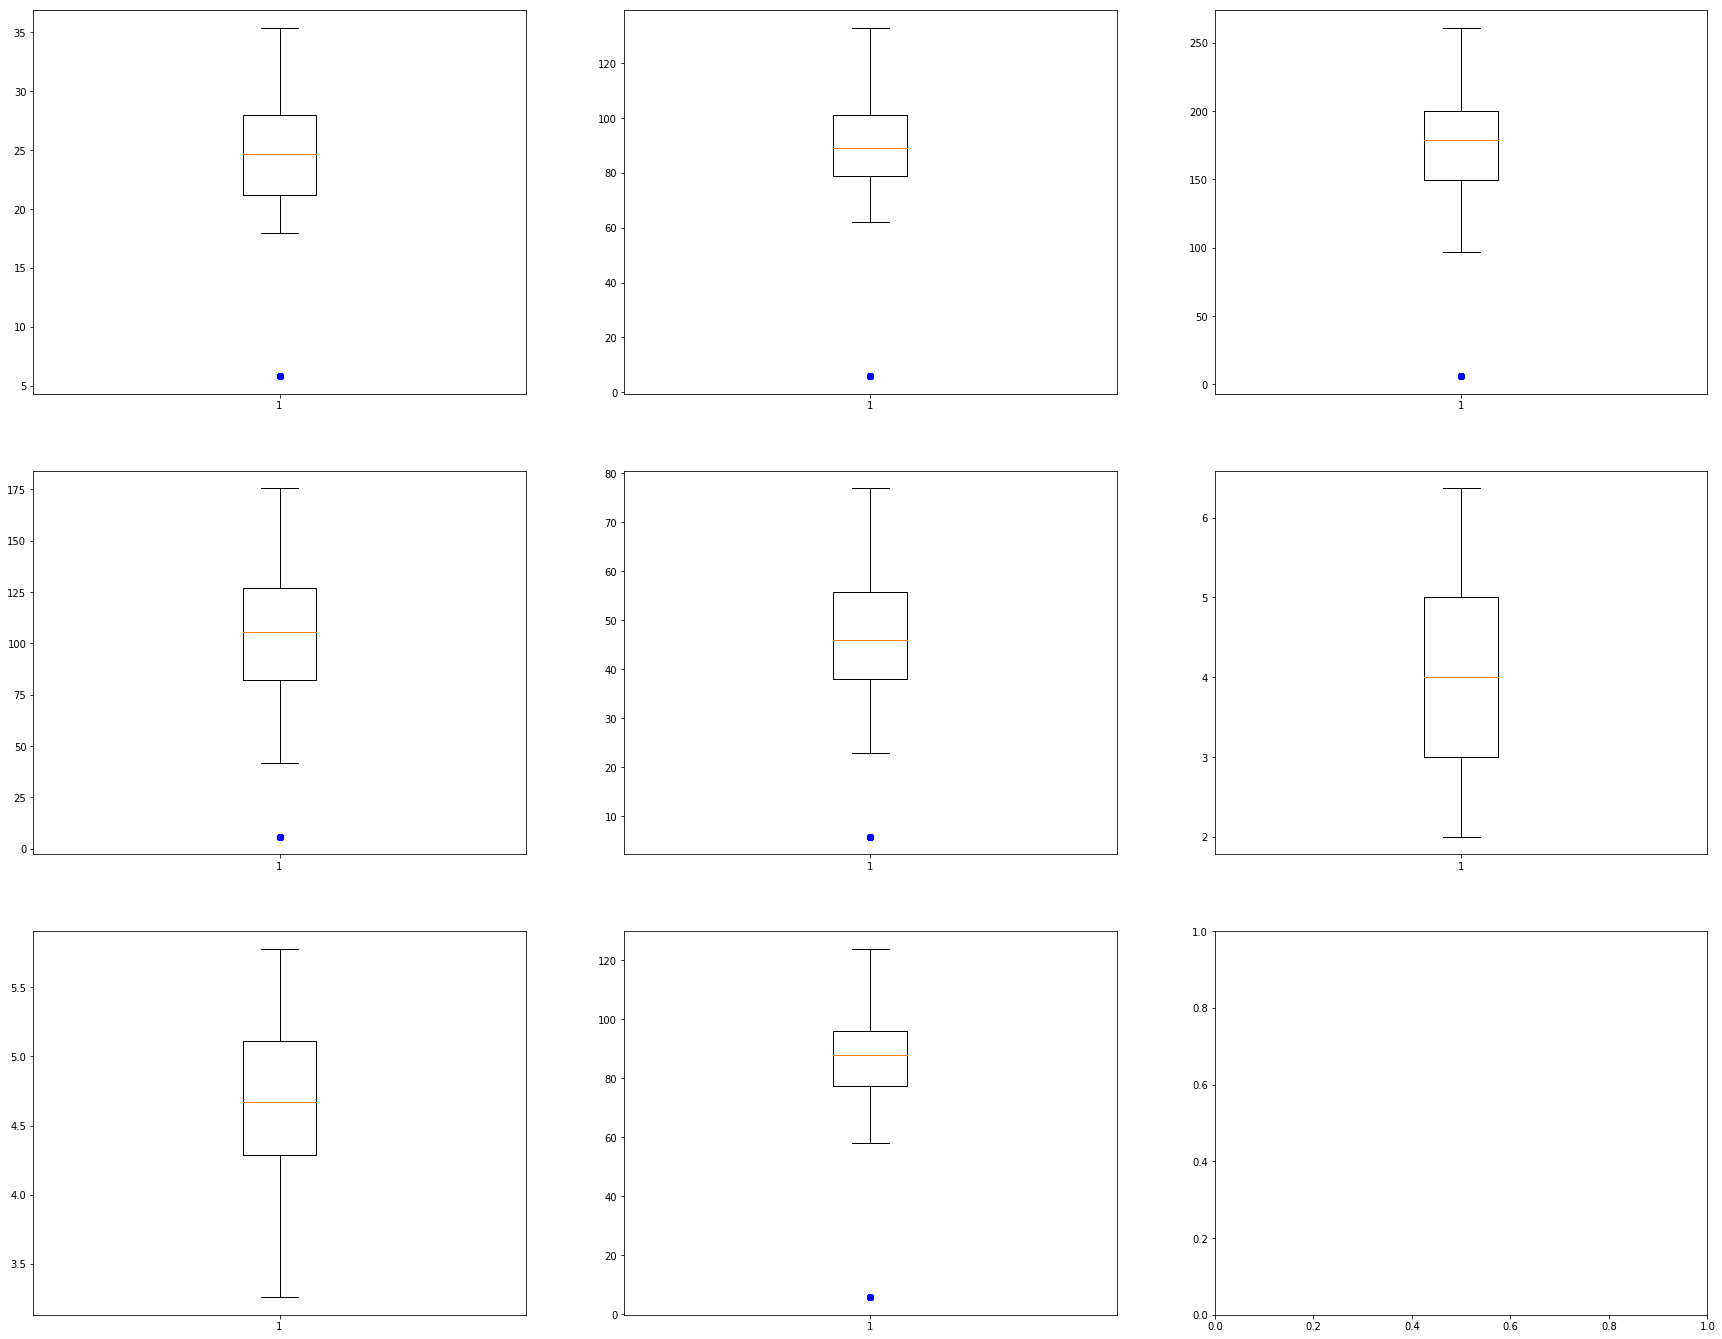

In [6]:
f, ax = plt.subplots(3, 3, figsize=(30, 24))
ax[0, 0].boxplot(df_raw['BMI'], sym="bo")
ax[0, 1].boxplot(df_raw['BP'], sym="bo")
ax[0, 2].boxplot(df_raw['CHOLESTEROL'], sym="bo")
ax[1, 0].boxplot(df_raw['LDL'], sym="bo")
ax[1, 1].boxplot(df_raw['HDL'], sym="bo")
ax[1, 2].boxplot(df_raw['TCH'], sym="bo")
ax[2, 0].boxplot(df_raw['LTG'], sym="bo")
ax[2, 1].boxplot(df_raw['GLUCOSE'], sym="bo")
plt.show()

In [4]:
df_BMI_out = 1.5 * df_raw.describe().round(3)['BMI']['std'] + df_raw.describe().round(3)['BMI']['75%']
df_CHOLESTEROL_out = 1.5 * df_raw.describe().round(3)['CHOLESTEROL']['std'] + df_raw.describe().round(3)['CHOLESTEROL']['75%']
df_LDL_out = 1.5 * df_raw.describe().round(3)['LDL']['std'] + df_raw.describe().round(3)['LDL']['75%']
df_HDL_out = 1.5 * df_raw.describe().round(3)['HDL']['std'] + df_raw.describe().round(3)['HDL']['75%']
df_TCH_out = 1.5 * df_raw.describe().round(3)['TCH']['std'] + df_raw.describe().round(3)['TCH']['75%']
df_LTG_out = 1.5 * df_raw.describe().round(3)['LTG']['std'] + df_raw.describe().round(3)['LTG']['75%']

In [5]:
df_raw[df_raw['BMI'] > df_BMI_out] = df_BMI_out
df_raw[df_raw['CHOLESTEROL'] > df_CHOLESTEROL_out] = df_CHOLESTEROL_out
df_raw[df_raw['LDL'] > df_LDL_out] = df_LDL_out
df_raw[df_raw['HDL'] > df_HDL_out] = df_HDL_out
df_raw[df_raw['TCH'] > df_TCH_out] = df_TCH_out
df_raw[df_raw['LTG'] > df_LTG_out] = df_LTG_out

df_raw.loc[df_raw["변수"]>=1.5IQR값,["변수"]] = 1.5IQR값

np.percentile(df_raw[],[25:75])


df.loc[df.A > 10, ["C", "D"]]